In [57]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt

In [4]:
# Path to the folder (relative to notebook)
folder_path = "data"

# Find all CSV files inside that folder
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

# Read and concatenate them
dfs = []
for file in csv_files:
    df = pd.read_csv(file)
    df["source_file"] = os.path.basename(file)   # optional: track source
    dfs.append(df)

final_df = pd.concat(dfs, ignore_index=True)

print(f"✅ Combined {len(csv_files)} CSV files.")
print("Final DataFrame shape:", final_df.shape)

# Display first few rows
final_df.head()

✅ Combined 75 CSV files.
Final DataFrame shape: (1095744, 9)


,date,time,exchange,name,ltp,last_trade_qty,total_trade_amount,total_trade_qty,source_file
0,0,09:15:00.000000000,NSECM,AUBANK,565.45,70.0,1477520.85,2613.0,20250303.data.csv
1,0,09:15:00.000000000,NSEFO,AUBANK25APRFUT,NaN,NaN,NaN,NaN,20250303.data.csv
2,0,09:15:00.000000000,NSEFO,AUBANK25MARFUT,566.65,2000.0,1133300.00,2000.0,20250303.data.csv
3,0,09:15:00.000000000,NSECM,AXISBANK,1017.05,10.0,44051486.65,43313.0,20250303.data.csv
4,0,09:15:00.000000000,NSEFO,AXISBANK25APRFUT,NaN,NaN,NaN,NaN,20250303.data.csv


In [5]:
final_df.tail()

,date,time,exchange,name,ltp,last_trade_qty,total_trade_amount,total_trade_qty,source_file
1095739,0,15:30:00.000000000,NSEFO,PNB25JULFUT,106.38,8000.0,3.743168e+09,35200000.0,20250626.data.csv
1095740,0,15:30:00.000000000,NSEFO,PNB25JUNFUT,105.78,8000.0,2.576413e+09,24384000.0,20250626.data.csv
1095741,0,15:30:00.000000000,NSECM,SBIN,NaN,NaN,NaN,NaN,20250626.data.csv
1095742,0,15:30:00.000000000,NSEFO,SBIN25JULFUT,800.10,750.0,1.814308e+10,22637250.0,20250626.data.csv
1095743,0,15:30:00.000000000,NSEFO,SBIN25JUNFUT,795.40,750.0,1.094046e+10,13733250.0,20250626.data.csv


In [25]:
final_df = final_df[final_df['exchange']=='NSECM']

In [26]:
grouped_df = final_df.groupby(by='name')

In [27]:
grouped_df.get_group('AUBANK')

,date,time,exchange,name,ltp,last_trade_qty,total_trade_amount,total_trade_qty,source_file
0,0,09:15:00.000000000,NSECM,AUBANK,565.45,70.0,1477520.85,2613.0,20250303.data.csv
39,0,09:16:00.000000000,NSECM,AUBANK,565.00,1.0,13856153.85,24483.0,20250303.data.csv
78,0,09:17:00.000000000,NSECM,AUBANK,565.85,11.0,17689941.06,31251.0,20250303.data.csv
117,0,09:18:00.000000000,NSECM,AUBANK,563.45,99.0,20780841.25,36725.0,20250303.data.csv
156,0,09:19:00.000000000,NSECM,AUBANK,562.70,37.0,26608481.76,47068.0,20250303.data.csv
...,...,...,...,...,...,...,...,...,...
1095549,0,15:26:00.000000000,NSECM,AUBANK,NaN,NaN,NaN,NaN,20250626.data.csv
1095588,0,15:27:00.000000000,NSECM,AUBANK,NaN,NaN,NaN,NaN,20250626.data.csv
1095627,0,15:28:00.000000000,NSECM,AUBANK,NaN,NaN,NaN,NaN,20250626.data.csv
1095666,0,15:29:00.000000000,NSECM,AUBANK,NaN,NaN,NaN,NaN,20250626.data.csv


In [29]:
grouped_df.get_group('CANBK')

,date,time,exchange,name,ltp,last_trade_qty,total_trade_amount,total_trade_qty,source_file
12,0,09:15:00.000000000,NSECM,CANBK,81.25,90.0,4.936750e+06,60760.0,20250303.data.csv
51,0,09:16:00.000000000,NSECM,CANBK,81.09,1109.0,4.919364e+07,604493.0,20250303.data.csv
90,0,09:17:00.000000000,NSECM,CANBK,81.39,12.0,6.839509e+07,840751.0,20250303.data.csv
129,0,09:18:00.000000000,NSECM,CANBK,81.36,1.0,2.997805e+08,3695974.0,20250303.data.csv
168,0,09:19:00.000000000,NSECM,CANBK,81.55,1.0,3.076581e+08,3793097.0,20250303.data.csv
...,...,...,...,...,...,...,...,...,...
1095561,0,15:26:00.000000000,NSECM,CANBK,NaN,NaN,NaN,NaN,20250626.data.csv
1095600,0,15:27:00.000000000,NSECM,CANBK,NaN,NaN,NaN,NaN,20250626.data.csv
1095639,0,15:28:00.000000000,NSECM,CANBK,NaN,NaN,NaN,NaN,20250626.data.csv
1095678,0,15:29:00.000000000,NSECM,CANBK,NaN,NaN,NaN,NaN,20250626.data.csv


In [65]:
bank_nifty = grouped_df.get_group('BANKNIFTY')
bank_nifty = bank_nifty.reset_index()

In [33]:
tickers = list(final_df['name'].unique())

In [34]:
tickers.remove('BANKNIFTY')
tickers

['AUBANK',
 'AXISBANK',
 'BANKBARODA',
 'CANBK',
 'FEDERALBNK',
 'HDFCBANK',
 'ICICIBANK',
 'IDFCFIRSTB',
 'INDUSINDBK',
 'KOTAKBANK',
 'PNB',
 'SBIN']

In [37]:
import pandas as pd

df2 = []
for t in tickers:
    df = grouped_df.get_group(t).dropna().reset_index(drop=True)
    # Optional: keep only the columns you need
    df = df[["ltp"]]  # for example, only price column
    df.columns = [t]  # rename column to ticker name
    df2.append(df)

# Concatenate side by side
finals = pd.concat(df2, axis=1)

print(finals.shape)
finals.tail()

(27679, 12)


,AUBANK,AXISBANK,BANKBARODA,CANBK,FEDERALBNK,HDFCBANK,ICICIBANK,IDFCFIRSTB,INDUSINDBK,KOTAKBANK,PNB,SBIN
27674,800.5,1222.8,237.72,110.55,209.20,1962.0,1424.5,71.99,831.45,2227.3,105.10,796.20
27675,800.6,1222.5,237.70,110.60,209.18,1962.3,1424.6,71.98,830.70,2227.8,105.09,796.10
27676,800.6,1222.6,237.74,110.60,209.35,1963.3,1424.9,71.99,831.00,2225.9,105.07,796.00
27677,800.0,1223.0,237.71,110.64,209.10,1963.4,1424.8,72.00,831.45,2219.8,105.09,795.85
27678,NaN,1221.7,237.70,110.63,NaN,1963.7,1424.0,NaN,831.45,NaN,NaN,795.75


In [46]:
df_dict = {}


for t in tickers:
    df = grouped_df.get_group(t).dropna(subset=["ltp",'total_trade_amount' ,"total_trade_qty"]).reset_index(drop=True)

    # Keep only the columns you care about
    df = df[["ltp",'total_trade_amount',"total_trade_qty"]].rename(columns={"total_trade_qty": "volume"})

    # Store in dictionary with ticker as key
    df_dict[t] = df

# Concatenate side by side → MultiIndex columns (ticker, metric)
final_df = pd.concat(df_dict, axis=1)

# Reset index to start from 1
final_df.index = range(1, len(final_df) + 1)

# print(final_df.columns)

final_df = final_df.dropna()

In [69]:
# --- 1) Slice views for each metric across all tickers ---
ltp  = final_df.xs('ltp', level=1, axis=1)
tamt = final_df.xs('total_trade_amount', level=1, axis=1)
vol  = final_df.xs('volume', level=1, axis=1)

# --- 2) Convert cumulative to per-minute deltas ---
turnover = tamt.diff().clip(lower=0).fillna(0)   # ₹ traded in the minute
shares   = vol.diff().clip(lower=0).fillna(0)    # shares traded in the minute

# --- 3) Minute VWAP with fallback to LTP when no trades in that minute ---
with np.errstate(divide='ignore', invalid='ignore'):
    vwap_vals = turnover.values / shares.values
vwap = pd.DataFrame(vwap_vals, index=turnover.index, columns=turnover.columns)
vwap = vwap.where(shares > 0, ltp)  # if a minute has zero shares, use LTP for that stock

# --- 4) Per-minute turnover weights (sum to 1 row-wise) ---
turn_sum = turnover.sum(axis=1)
weights = turnover.div(turn_sum, axis=0)

# If total turnover is 0 for a minute → carry forward weights; if still NaN at the start, use equal weights.
equal_w = pd.Series(1.0 / turnover.shape[1], index=turnover.columns)
weights = weights.mask(turn_sum.eq(0)).ffill().fillna(equal_w)

# --- 5) Raw index = sum_i w_i * price_i (using VWAP) ---
raw_index = (weights.values * vwap.values).sum(axis=1)
raw_index = pd.Series(raw_index, index=final_df.index, name='raw_vol_wtd_index')

# --- 6) Scale: to official index if available, else base-100 ---
try:
    # If you have official BankNifty per-minute in a Series named `bn_official` (aligned to final_df.index)
    common = raw_index.index.intersection(bn_official.index)
    t0 = common[0]
    alpha = float(bn_official.loc[t0]) / float(raw_index.loc[t0]) if raw_index.loc[t0] != 0 else 1.0
    bn_constructed_index = (alpha * raw_index).rename('bn_constructed_index')
except NameError:
    # No official series provided → base-100
    t0 = raw_index.first_valid_index()
    base = float(raw_index.loc[t0]) if raw_index.loc[t0] != 0 else 1.0
    bn_constructed_index = (100.0 * raw_index / base).rename('bn_constructed_index')

# --- 7) Done: `bn_constructed_index` is your full time series ---
# If you also want a comparison frame with official (when available):
# out = pd.DataFrame({'bn_constructed_index': bn_constructed_index})
# if 'bn_official' in globals():
#     out['bn_index'] = bn_official.reindex(out.index)

# Optional: save just the constructed series for this date
# bn_constructed_index.to_csv("customdata/20250320_cm_index_only.csv", header=True)

<Axes: >

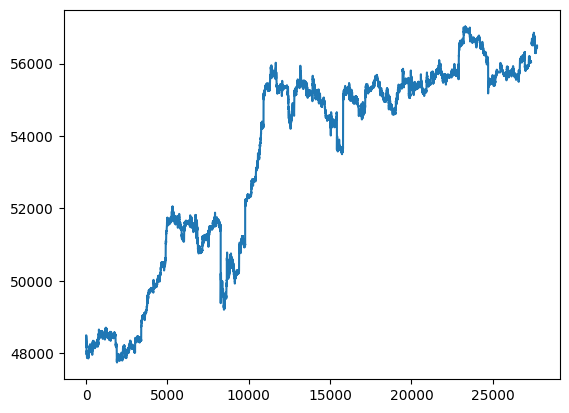

In [67]:
bank_nifty['ltp'].plot()